10 (2, 4)
For point (0, 1) the output should be z = 2
For point (1, 3) the output should be z = 7
For point (2, 4) the output should be z = 10
For point (4, 2) the output should be z = 8
For point (5, 0) the output should be z = 5


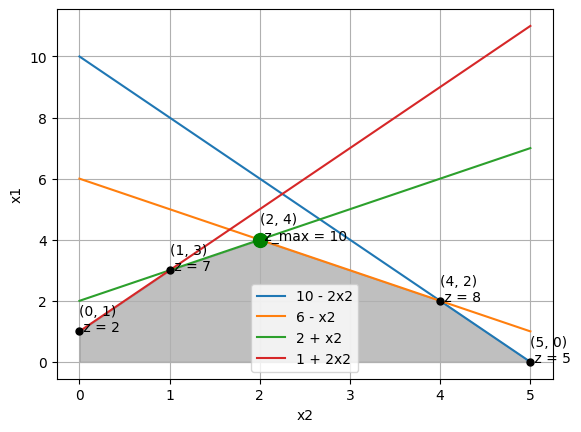

In [ ]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt 

x2 = np.linspace(0,5,100)

y1 = 10 - 2*x2
y2 = 6 - x2
y3 = 2 + x2
y4 = 1 + 2*x2

y1 = np.maximum(0, y1)
y2 = np.maximum(0, y2) 
y3 = np.maximum(0, y3)
y4 = np.maximum(0, y4)

def objective(x, y):
    return 2*y + x

plt.plot(x2, y1, label='10 - 2x2')
plt.plot(x2, y2, label='6 - x2')
plt.plot(x2, y3, label='2 + x2')
plt.plot(x2, y4, label='1 + 2x2')
plt.fill_between(x2, 0, np.minimum(np.minimum(y1, y2), np.minimum(y3, y4)), where=(y1 > 0) & (y2 > 0) & (y3 > 0) & (y4 > 0), color='gray', alpha=0.5)
plt.legend()
plt.xlabel('x2')
plt.ylabel('x1')
plt.grid()


corner_points = [(0,1), (1,3), (2,4), (4,2), (5,0)]
z_values = [objective(point[0], point[1]) for point in corner_points]
z_max_index = z_values.index(max(z_values))
z_max = z_values[z_max_index]
optimal_point = corner_points[z_max_index]

for i,point in enumerate(corner_points):
    print(f'For point {point} the output should be z = {z_values[i]}')
    if i == z_max_index:
        plt.plot(point[0], point[1], markersize = 10, marker = "o", color ='green')
        plt.annotate(f'{point[0],point[1]} \n z_max = {z_values[i]}',xy = (point[0],point[1]))
    else:
        plt.plot(point[0], point[1], markersize = 5, marker = "o", color ='black')
        plt.annotate(f'{point[0],point[1]} \n z = {z_values[i]}',xy = (point[0],point[1]))
plt.show()




In [33]:
# Verification using scipy.optimize.linprog
print("Verification using scipy linprog:")
print("=" * 35)

# Set up for linprog (minimization, so negate objective coefficients)
c = [-2, -1]  # Negative because linprog minimizes
A = [[1, 2], [1, 1], [1, -1], [1, -2]]  # Constraint matrix
b = [10, 6, 2, 1]  # Constraint bounds
bounds = [(0, None), (0, None)]  # x1, x2 ≥ 0

result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex')

if result.success:
    print(f"Optimal solution: x₁ = {result.x[0]:.2f}, x₂ = {result.x[1]:.2f}")
    print(f"Maximum Z value: {-result.fun:.2f}")
    print("✓ Solution matches our graphical method!")
else:
    print("Optimization failed")

Verification using scipy linprog:
Optimal solution: x₁ = 4.00, x₂ = 2.00
Maximum Z value: 10.00
✓ Solution matches our graphical method!


C:\Users\arups\AppData\Local\Temp\ipykernel_18676\3177204320.py:11: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex')
